In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import re
import nltk
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

from keras.layers import Dense, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
#ESTO NO LO EJECUTEN SI UTILIZAN UNA VERSION DE PC , YO LO HAGO PARA PODER USAR EL TRAIN DE MI DRIVE,Y USAR EL GITHUB ONLINE
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1RJH-BaqHHtZzrSgu6yUVc8bRXcfev9tB'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('train_1.csv')

In [ ]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1sivn_RJ13uL13DmmB_G03yJRJWw_b2He'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('train_2.csv')

In [ ]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1eO4Vnym1_XoOx8yL1UC9WmZJvROH4dt_'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('train_3.csv')


In [ ]:
#1FISGm4sd86zaRHllaD4KyGTkMxzpraMa

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1FISGm4sd86zaRHllaD4KyGTkMxzpraMa'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('submission.csv')

In [ ]:

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '18Ab39T1hPgTBv58oXdVk0NfBE36Fp21D'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('test_3.csv')


In [ ]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
test_id = '1OTstoLjGdjErzHwd3bM5EPUHo0BrSG92'
downloaded = drive.CreateFile({'id': test_id})
downloaded.GetContentFile('test_loca_1.csv')

In [ ]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
test_id = '1jOXKPSAewX7t_fXXAAE-_3AD3vtxW1X5'
downloaded = drive.CreateFile({'id': test_id})
downloaded.GetContentFile('data_loca_1.csv')

In [ ]:
test_original=pd.read_csv('test_original.csv')

In [ ]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
test_id = '1uPd0roB5CyXnjXHm3R_0QqKcoaCZyrpX'
downloaded = drive.CreateFile({'id': test_id})
downloaded.GetContentFile('test_original.csv')

In [ ]:
#train_1 = pd.read_csv('train_1.csv')
#train_2= pd.read_csv('train_2.csv')
train_3=pd.read_csv('data_loca_1.csv')
test_3=pd.read_csv('test_loca_1.csv')
train_3=pd.read_csv('train_3.csv')
test_3=pd.read_csv('test_3.csv')

In [ ]:
#limpiando el texto

def clean_text(train):

  import nltk
  nltk.download('stopwords') 
  nltk.download('punkt')
  nltk.download('wordnet')
  from nltk.tokenize import word_tokenize
  from nltk.corpus import stopwords
  from nltk.stem.wordnet import WordNetLemmatizer

  #FUNCIONES UTILES

  def only_letters(tweet):
      tweet = re.sub(r'http\S*', '', tweet)
      tweet = re.sub(r'[^a-z\s]', '', tweet)
      return tweet

  stop_words=set(stopwords.words("english"))

  def filter_stopwords(tokenized_text):
      filtered_words=[]
      for w in tokenized_text:
          if w not in stop_words:
              filtered_words.append(w)
      return filtered_words

  lemmatizer = WordNetLemmatizer()

  def lemmatize_tweet(tweet):
      lemmatized_words = []
      for word in tweet:
          lemmatized_words.append(lemmatizer.lemmatize(word))
      return lemmatized_words

  def transform_to_text(tweet_words):
      return " ".join(tweet_words)

  #Cleaning text

  train['clean_text'] = train['text'].str.lower()

  train['clean_text'] = train['clean_text'].apply(only_letters)    

  #Tokenización

  train['clean_text'] = train['clean_text'].apply(word_tokenize)

  #Remove stopwords

  train['clean_text'] = train['clean_text'].apply(filter_stopwords) 

  #Lemmatization                                                                       

  train['clean_text'] = train['clean_text'].apply(lemmatize_tweet)  

  train['clean_text'] = train['clean_text'].apply(transform_to_text)

In [ ]:
def feature_hashing(cant_column_original,cant_colum_reducir,matriz_original):

  import random
   
  a=[]
  filas=cant_column_original
  columnas=cant_colum_reducir
  for i in range(filas):
      binario=0
      second=0
      a.append([])
      for j in range(columnas):
          binario=random.randint(0,2)
          if( binario==1 and second==0):
            
            second=1
            a[i].append(1)
          elif(j==columnas-1 and second==0):
            a[i].append(1)
          else:  
            a[i].append(0)  

  B=list(a)

  result=matriz_original.dot(B)

  return result 

In [ ]:
#hacerlo despues de agregar features, para setear las locaciones vacias con not_location
#locaciones con 1 o dos tweet, no aportan nada a la machine learning, mayores a 5 tomo minimo
def nombres_locaciones_mayor_frecuencia(train):
  filtro_cant_location=train.groupby('location').agg(cantidad_apariciones=('location','count'))
  nombres_locaciones_mayor_frecuencia=filtro_cant_location[filtro_cant_location['cantidad_apariciones']>5].index
  nombres_locaciones_mayor_frecuencia=list(nombres_locaciones_mayor_frecuencia)
  train_filtrado=train[train['location'].isin(nombres_locaciones_mayor_frecuencia)==True]
  return train_filtrado

In [ ]:
#se hace afuera porque seteo con el fin las palabras de tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
corpus=train_3['clean_text']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
#feature_hashing# reducimos dimension de tf-idf por teorema de listruss johson

matriz_tfidf=X.toarray()
filas=matriz_tfidf.shape[0]
cant_column_original=matriz_tfidf.shape[1]
matriz_red=feature_hashing(cant_column_original,60,matriz_tfidf)

  #agregamos esas columnas a la matriz original
df = pd.DataFrame(matriz_red) 
train_3[list(df.columns)]=df

In [ ]:
def feature_engi(train_3):
  train_tfidf=train_3

  #completo null
  train_tfidf['keyword'].fillna('no keyword', inplace = True)
  train_tfidf['location'].fillna('no location', inplace = True)
  #mean_encoding
  
 
   
  return train_tfidf





In [ ]:
#location_dic posee location y mean_enconding
def feature_engi_test(test ):
  train_tfidf=test

  #completo null
  train_tfidf['keyword'].fillna('no keyword', inplace = True)
  train_tfidf['location'].fillna('no location', inplace = True)
  #mean_encoding
  
    
  train_tfidf['mean_encoding_location']= train_tfidf['location'].map(location_dict)
  train_tfidf['mean_encoding_keyword']= train_tfidf['keyword'].map(keyword_dict)
  train_tfidf['nrow']=train_tfidf.groupby('keyword')['keyword'].transform('count')
  train_tfidf['nrow']=train_tfidf.groupby('location')['location'].transform('count')

  train_tfidf['mean_target_global']=5
  train_tfidf['regularizacion_mean']=0.9 
    
  #tf-idf

  
  corpus=train_tfidf['clean_text']
  #vectorizer = TfidfVectorizer() ya lo cargamos antes en el train
  X = vectorizer.transform(corpus)
  #print(vectorizer.get_feature_names())

  #feature_hashing# reducimos dimension de tf-idf por teorema de listruss johson

  matriz_tfidf=X.toarray()
  filas=matriz_tfidf.shape[0]
  cant_column_original=matriz_tfidf.shape[1]
  matriz_red=feature_hashing(cant_column_original,60,matriz_tfidf)

  #agregamos esas columnas a la matriz original
  df = pd.DataFrame(matriz_red) 
  train_tfidf[list(df.columns)]=df

  return train_tfidf

In [ ]:
#FUNCIONES UTILES

import nltk
nltk.download('stopwords') 
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import PunktSentenceTokenizer

nltk.download('averaged_perceptron_tagger')

def only_letters(tweet):
    tweet = re.sub(r'http\S*', '', tweet)
    tweet = re.sub(r'[^a-z\s]', '', tweet)
    return tweet

stop_words=set(stopwords.words("english"))

def filter_stopwords(tokenized_text):
    filtered_words=[]
    for w in tokenized_text:
        if w not in stop_words:
            filtered_words.append(w)
    return filtered_words

lemmatizer = WordNetLemmatizer()

def lemmatize_tweet(tweet):
    lemmatized_words = []
    for word in tweet:
        lemmatized_words.append(lemmatizer.lemmatize(word))
    return lemmatized_words

def transform_to_text(tweet_words):
    return " ".join(tweet_words)

custom_sent_tokenizer = PunktSentenceTokenizer()

def process_content(sentence):
    tokenized = custom_sent_tokenizer.tokenize(sentence)
    words_tagged = []
    for i in tokenized:
        words = nltk.word_tokenize(i)
        tagged = nltk.pos_tag(words)
        for word in tagged:
            words_tagged.append(word)
            
    return words_tagged

#Cleaning text
train_data=train_3
test_data=test_3

train_data['clean_text'] = train_data['text'].str.lower()
test_data['clean_text'] = test_data['text'].str.lower()

train_data['clean_text'] = train_data['clean_text'].apply(only_letters)
test_data['clean_text'] = test_data['clean_text'].apply(only_letters)   

#Tokenización

train_data['clean_text'] = train_data['clean_text'].apply(word_tokenize)
test_data['clean_text'] = test_data['clean_text'].apply(word_tokenize)

#Remove stopwords

train_data['clean_text'] = train_data['clean_text'].apply(filter_stopwords)
test_data['clean_text'] = test_data['clean_text'].apply(filter_stopwords)

#Lemmatization                                                                       

train_data['clean_text'] = train_data['clean_text'].apply(lemmatize_tweet)
test_data['clean_text'] = test_data['clean_text'].apply(lemmatize_tweet)

#Transform to text
train_data['clean_text'] = train_data['clean_text'].apply(transform_to_text)
test_data['clean_text'] = test_data['clean_text'].apply(transform_to_text)

test_data
#Part of speech tagging

train_data['tagged_text']= train_data['text'].apply(process_content)
train_data['tagged_clean_text']= train_data['clean_text'].apply(process_content)

test_data['tagged_text']= test_data['text'].apply(process_content)
test_data['tagged_clean_text']= test_data['clean_text'].apply(process_content)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
def count_Nouns(list):
    nouns = 0
    for word,tag in list:
        if tag[0] == 'N':
            nouns += 1
        else:
            continue
    return nouns

def count_Adjetives(list):
    adjetives = 0
    for word,tag in list:
        if tag[0] == 'J':
            adjetives += 1
        else:
            continue
    return adjetives

def count_Verbs(list):
    verbs = 0
    for word,tag in list:
        if tag[0] == 'V':
            verbs += 1
        else:
            continue
    return verbs 


# word_count




# mean_word_length
train_data['mean_word_length'] = train_data['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test_data['mean_word_length'] = test_data['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# length
train_data['tweet_length'] = train_data['text'].apply(lambda x: len(str(x)))
test_data['tweet_length'] = test_data['text'].apply(lambda x: len(str(x)))

# punctuation_count
#train_data['punctuation_count'] = train_data['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#test_data['punctuation_count'] = test_data['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))



In [ ]:
train_data

,Unnamed: 0,id,keyword,location,text,target,clean_text,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,tagged_text,tagged_clean_text,mean_word_length,tweet_length
0,0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,bbcmtd wholesale market ablaze,1.138197,0.425568,0.000000,0.000000,0.000000,0.000000,0.000000,0.411563,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[(@, NN), (bbcmtd, JJ), (Wholesale, NNP), (Mar...","[(bbcmtd, JJ), (wholesale, JJ), (market, NN), ...",10.200000,55
1,1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,always try bring heavy metal rt,0.873987,0.325781,0.434518,0.801681,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[(We, PRP), (always, RB), (try, VBP), (to, TO)...","[(always, RB), (try, VB), (bring, VBG), (heavy...",5.800000,67
2,2,50,ablaze,Africa,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaze breaking newsnigeria flag set abla...,0.304116,1.174418,0.656383,0.471128,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[(#, #), (AFRICANBAZE, NNP), (:, :), (Breaking...","[(africanbaze, NN), (breaking, VBG), (newsnige...",8.222222,82
3,3,52,ablaze,Philadelphia,Crying out for more! Set me ablaze,0,cry set ablaze,1.146980,0.581461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[(Crying, VBG), (out, RP), (for, IN), (more, J...","[(cry, NN), (set, NN), (ablaze, NN)]",4.000000,34
4,4,53,ablaze,Florida,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,plus side look sky last night ablaze,0.302985,1.165393,1.155812,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[(On, IN), (plus, CC), (side, JJ), (LOOK, NNP)...","[(plus, CC), (side, JJ), (look, NN), (sky, NN)...",4.923077,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1,flip side im walmart bomb everyone evacuate st...,0.633782,1.046261,0.309159,0.199157,0.238760,0.676575,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[(on, IN), (the, DT), (flip, JJ), (side, NN), ...","[(flip, JJ), (side, NN), (im, JJ), (walmart, N...",3.423077,114
7609,7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,suicide bomber kill saudi security site mosque...,1.081358,0.000000,0.934805,0.679951,0.544009,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.320079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:

feature_train=feature_engi(train_data)

    

feature_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 71 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7613 non-null   int64  
 1   id                 7613 non-null   int64  
 2   keyword            7613 non-null   object 
 3   location           7613 non-null   object 
 4   text               7613 non-null   object 
 5   target             7613 non-null   int64  
 6   clean_text         7613 non-null   object 
 7   0                  7613 non-null   float64
 8   1                  7613 non-null   float64
 9   2                  7613 non-null   float64
 10  3                  7613 non-null   float64
 11  4                  7613 non-null   float64
 12  5                  7613 non-null   float64
 13  6                  7613 non-null   float64
 14  7                  7613 non-null   float64
 15  8                  7613 non-null   float64
 16  9                  7613 

In [ ]:

feature_train['mean_encoding_keyword']=feature_train.groupby('keyword')['target'].transform('mean')
feature_train['mean_encoding_location']=feature_train.groupby('location')['target'].transform('mean')

In [ ]:
feature_train['nrow']=feature_train.groupby('keyword')['target'].transform('count')
feature_train['nrow_loc']=feature_train.groupby('location')['target'].transform('count')



In [ ]:
feature_train['mean_target_global']=feature_train['target'].mean()
feature_train['regularizacion_mean']=80

In [ ]:
feature_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 77 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              7613 non-null   int64  
 1   id                      7613 non-null   int64  
 2   keyword                 7613 non-null   object 
 3   location                7613 non-null   object 
 4   text                    7613 non-null   object 
 5   target                  7613 non-null   int64  
 6   clean_text              7613 non-null   object 
 7   0                       7613 non-null   float64
 8   1                       7613 non-null   float64
 9   2                       7613 non-null   float64
 10  3                       7613 non-null   float64
 11  4                       7613 non-null   float64
 12  5                       7613 non-null   float64
 13  6                       7613 non-null   float64
 14  7                       7613 non-null   

In [ ]:
#cargamos las columnas entre otras coas

feature_train=feature_engi(train_3 )
feature_train_mas_frecuente=feature_train
#feature_train_mas_frecuente=nombres_locaciones_mayor_frecuencia(feature_train)

# agrego columnas del test

In [ ]:
#las locaciones con mean_coding_location lo saco del train
location_dict = pd.Series(feature_train_mas_frecuente['mean_encoding_location'].values, index=feature_train_mas_frecuente['location']).to_dict()
#completo con mean_encoding_keyword
keyword_dict = pd.Series(feature_train_mas_frecuente['mean_encoding_keyword'].values, index=feature_train_mas_frecuente['keyword']).to_dict()

In [ ]:
test_3=pd.read_csv('test_3.csv')

In [ ]:
clean_text(test_3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
test_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3263 non-null   int64 
 1   id          3263 non-null   int64 
 2   keyword     3237 non-null   object
 3   location    2383 non-null   object
 4   text        3263 non-null   object
 5   clean_text  3263 non-null   object
dtypes: int64(2), object(4)
memory usage: 153.1+ KB


In [ ]:
test_with_feature=feature_engi_test(test_3)
#relleno con 0 los que estan con nan los mean_encoding_location
test_with_feature['mean_encoding_location']=test_with_feature['mean_encoding_location'].fillna(0)
test_with_feature['mean_encoding_keyword']=test_with_feature['mean_encoding_keyword'].fillna(0)

In [ ]:
test_with_feature.head(2)

,Unnamed: 0,id,keyword,location,text,clean_text,mean_encoding_location,mean_encoding_keyword,nrow,mean_target_global,regularizacion_mean,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0,46,ablaze,Florida,Birmingham Wholesale Market is ablaze BBC News...,birmingham wholesale market ablaze bbc news fi...,0.369099,0.361111,71,5,0.9,1.002696,0.0,0.713395,0.000000,0.229921,0.00000,0.0,0.0,0.0,0.00000,0.566452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,47,ablaze,Niall's place | SAF 12 SQUAD |,@sunkxssedharry will you wear shorts for race ...,sunkxssedharry wear short race ablaze,0.000000,0.361111,1,5,0.9,0.428460,0.0,0.000000,0.475949,0.000000,0.54309,0.0,0.0,0.0,0.54309,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#mean_encoding_keyword 	mean_encoding_location 	nrow 	mean_target_global 	regularizacion_mean

In [ ]:
def remove_unused_columns(data): 
  train_tfidf=data
  train_tfidf=train_tfidf.drop( columns='Unnamed: 0')
  train_tfidf=train_tfidf.drop( columns='keyword')
  train_tfidf=train_tfidf.drop( columns='location')
  train_tfidf=train_tfidf.drop( columns='clean_text')
  train_tfidf=train_tfidf.drop( columns='regularizacion_mean')
  train_tfidf=train_tfidf.drop( columns='mean_target_global')
  train_tfidf=train_tfidf.drop( columns='nrow')
  train_tfidf=train_tfidf.drop( columns='mean_encoding_location')
  train_tfidf=train_tfidf.drop( columns='mean_encoding_keyword')
  return train_tfidf

In [ ]:
def remove_unused_columns_train(data): 
  train_tfidf=data
  train_tfidf=train_tfidf.drop( columns='Unnamed: 0')
  train_tfidf=train_tfidf.drop( columns='keyword')
  train_tfidf=train_tfidf.drop( columns='location')
  train_tfidf=train_tfidf.drop( columns='clean_text')
  train_tfidf=train_tfidf.drop( columns='text')
  train_tfidf=train_tfidf.drop( columns='id')
  return train_tfidf

In [ ]:
dfs=feature_train_mas_frecuente

In [ ]:
dfs['smoothing_location']=(dfs['mean_encoding_location']*dfs['nrow'] + dfs['mean_target_global']*dfs['regularizacion_mean'])/(dfs['nrow'] + dfs['regularizacion_mean'])

In [ ]:
dfs['smoothing_keyword']=(dfs['mean_encoding_keyword']*dfs['nrow'] + dfs['mean_target_global']*dfs['regularizacion_mean'])/(dfs['nrow'] + dfs['regularizacion_mean'])

In [ ]:
def remove_unused_columns(data): 
  train_tfidf=data
  train_tfidf=train_tfidf.drop( columns='Unnamed: 0')
  train_tfidf=train_tfidf.drop( columns='keyword')
  train_tfidf=train_tfidf.drop( columns='location')
  train_tfidf=train_tfidf.drop( columns='clean_text')
  train_tfidf=train_tfidf.drop( columns='regularizacion_mean')
  train_tfidf=train_tfidf.drop( columns='mean_target_global')
  train_tfidf=train_tfidf.drop( columns='nrow')
  train_tfidf=train_tfidf.drop( columns='mean_encoding_location')
  train_tfidf=train_tfidf.drop( columns='mean_encoding_keyword')
  return train_tfidf

In [ ]:
train_formateado=remove_unused_columns_train(dfs)
train_formateado.head(2)

,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,tagged_text,tagged_clean_text,mean_word_length,tweet_length,mean_encoding_keyword,mean_encoding_location,nrow,nrow_loc,mean_target_global,regularizacion_mean,smoothing_location,smoothing_keyword
0,1,1.138197,0.425568,0.000000,0.000000,0.0,0.0,0.0,0.411563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[(@, NN), (bbcmtd, JJ), (Wholesale, NNP), (Mar...","[(bbcmtd, JJ), (wholesale, JJ), (market, NN), ...",10.2,55,0.361111,0.875,36,8,0.42966,80,0.567869,0.408386
1,0,0.873987,0.325781,0.434518,0.801681,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[(We, PRP), (always, RB), (try, VBP), (to, TO)...","[(always, RB), (try, VB), (bring, VBG), (heavy...",5.8,67,0.361111,0.000,36,1,0.42966,80,0.296317,0.408386


In [ ]:
#quito columnas inneesario de test

In [ ]:
test_formateado=remove_unused_columns(test_with_feature)
test_formateado.head(2)

,id,text,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,46,Birmingham Wholesale Market is ablaze BBC News...,1.002696,0.0,0.713395,0.000000,0.229921,0.00000,0.0,0.0,0.0,0.00000,0.566452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47,@sunkxssedharry will you wear shorts for race ...,0.428460,0.0,0.000000,0.475949,0.000000,0.54309,0.0,0.0,0.0,0.54309,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_aux=pd.read_csv('train_3.csv')


In [ ]:
train_formateado=train_formateado.drop( columns='target')


In [ ]:
train_formateado['target']=train_aux['target']
target=train_formateado['target']
train_formateado=train_formateado.drop( columns='target')


In [ ]:
train_formateado=train_formateado.drop( columns='mean_encoding_location')
train_formateado=train_formateado.drop( columns='mean_encoding_keyword')
train_formateado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 70 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   0                    7613 non-null   float64
 1   1                    7613 non-null   float64
 2   2                    7613 non-null   float64
 3   3                    7613 non-null   float64
 4   4                    7613 non-null   float64
 5   5                    7613 non-null   float64
 6   6                    7613 non-null   float64
 7   7                    7613 non-null   float64
 8   8                    7613 non-null   float64
 9   9                    7613 non-null   float64
 10  10                   7613 non-null   float64
 11  11                   7613 non-null   float64
 12  12                   7613 non-null   float64
 13  13                   7613 non-null   float64
 14  14                   7613 non-null   float64
 15  15                   7613 non-null   f

In [ ]:

train_formateado=train_formateado.drop( columns='tagged_clean_text')
train_formateado=train_formateado.drop( columns='tagged_text') 

In [ ]:
train_formateado.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,mean_word_length,tweet_length,nrow,nrow_loc,mean_target_global,regularizacion_mean,smoothing_location,smoothing_keyword
0,1.138197,0.425568,0.000000,0.000000,0.000000,0.000000,0.000000,0.411563,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.200000,55,36,8,0.42966,80,0.567869,0.408386
1,0.873987,0.325781,0.434518,0.801681,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.800000,67,36,1,0.42966,80,0.296317,0.408386
2,0.304116,1.174418,0.656383,0.471128,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.222222,82,36,37,0.42966,80,0.464071,0.408386
3,1.146980,0.581461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,34,36,35,0.42966,80,0.438189,0.408386
4,0.302985,1.165393,1.155812,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.923077,76,36,233,0.42966,80,0.410865,0.408386
5,0.749471,1.063944,0.321268,0.307177,0.283089,0.359690,0.283089,0.000000,0.0,0.0,0.307177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.857143,122,36,2,0.42966,80,0.296317,0.408386
6,0.776030,0.910581,0.000000,0.000000,0.522321,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000,55,36,1,0.42966,80,0.606662,0.408386
7,0.000000,1.413807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.600000,22,36,1,0.42966,80,0.296317,0.408386
8,0.812703,0.000000,0.582679,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.375000,114,36,2,0.42966,80,0.296317,0.408386
9,0.797451,0.961831,0.214935,0.569312,0.249686,0.655065,0.000000,0.000000,0.0,0.0,0.231587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.041667,120,36,1,0.42966,80,0.296317,0.408386


In [ ]:
target

0       1
1       0
2       1
3       0
4       0
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [ ]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
           k_features=(1,15),
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
sfs.fit(train_formateado, target)
print(sfs.k_feature_names_ )  

(0, 2, 8, 9, 12, 14, 15, 18, 20, 25, 'mean_word_length', 'tweet_length', 'nrow', 'smoothing_location', 'smoothing_keyword')


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


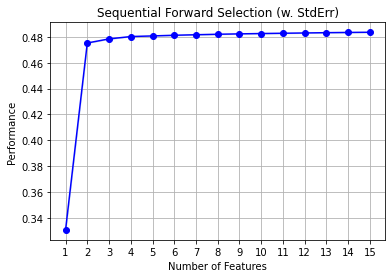

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
train_formateado.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,mean_word_length,tweet_length,nrow,nrow_loc,mean_target_global,regularizacion_mean,smoothing_location,smoothing_keyword
0,1.138197,0.425568,0.0,0.0,0.0,0.0,0.0,0.411563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.2,55,36,8,0.42966,80,0.567869,0.408386


In [ ]:
X= train_formateado[list(sfs.k_feature_names_) ]
y = target.values

In [ ]:
len(X.columns)

15

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0                   7613 non-null   float64
 1   2                   7613 non-null   float64
 2   8                   7613 non-null   float64
 3   9                   7613 non-null   float64
 4   12                  7613 non-null   float64
 5   14                  7613 non-null   float64
 6   15                  7613 non-null   float64
 7   18                  7613 non-null   float64
 8   20                  7613 non-null   float64
 9   25                  7613 non-null   float64
 10  mean_word_length    7613 non-null   float64
 11  tweet_length        7613 non-null   int64  
 12  nrow                7613 non-null   int64  
 13  smoothing_location  7613 non-null   float64
 14  smoothing_keyword   7613 non-null   float64
dtypes: float64(13), int64(2)
memory usage: 892.3 KB


In [ ]:
#Xgboost
import xgboost as xgb


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
X_train

,0,2,8,9,12,14,15,18,20,25,mean_word_length,tweet_length,nrow,smoothing_location,smoothing_keyword
6445,0.794623,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,79,33,0.415429,0.383830
3870,0.839910,0.584268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.476190,135,34,0.444674,0.354147
2431,1.870628,0.293009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.523810,136,45,0.416259,0.482982
5355,0.822584,0.528571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.500000,104,34,0.466336,0.459410
6496,0.452067,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.200000,73,39,0.413689,0.507334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,0.759998,0.548698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.312500,116,29,0.448374,0.434613
1346,1.214923,0.203107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.360000,133,41,0.426743,0.441097
3454,0.686843,0.652954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.142857,113,36,0.296317,0.417007
7533,0.958386,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.571429,77,40,0.413416,0.419773


In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 15, alpha = 10, n_estimators = 30000)

In [ ]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=30000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
preds = xg_reg.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.366394


In [ ]:
#Set de validación
preds = xg_reg.predict(X_test)
preds = preds >= 0.5
preds

array([False, False,  True, ..., False, False, False])

In [ ]:
from sklearn.metrics import f1_score

f1score = f1_score(y_test, preds)
print(f'F1 score: {f1score}')

F1 score: 0.7911741528762807


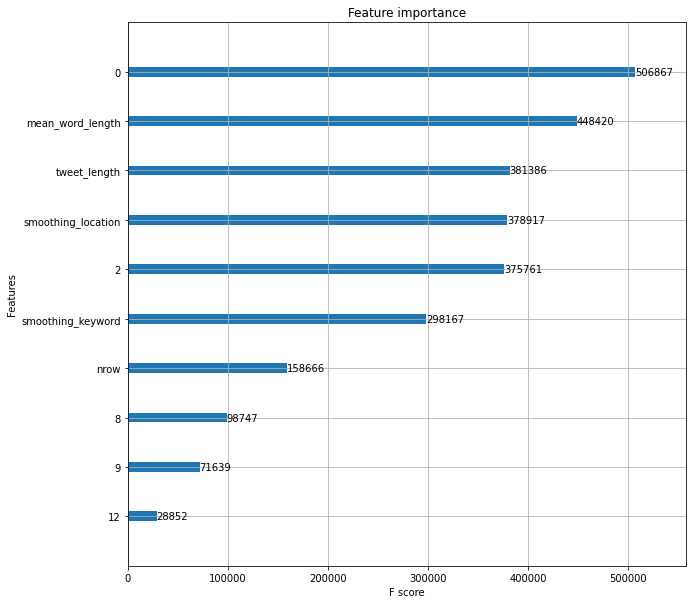

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
xgb.plot_importance(xg_reg, max_num_features=10, ax=ax)